In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
file_path = '/content/drive/MyDrive/Colab Notebooks/HR_comma_sep.csv'
my_df = pd.read_csv(file_path)
my_df

In [8]:
# Splitting the dataset into a and b
a = my_df.drop(columns=['left'])
b = my_df.left
a.shape, b.shape

((14999, 9), (14999,))

In [9]:
# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=88)
print("Training datasets: ", a_train.shape, b_train.shape)
print("Testing datasets: ", a_test.shape, b_test.shape)

Training datasets:  (11999, 9) (11999,)
Testing datasets:  (3000, 9) (3000,)


In [10]:
# Building Log regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000)

In [12]:
my_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [13]:
# Assuming 'a_train' is a DataFrame with categorical features
# Perform one-hot encoding
a_train_encoded = pd.get_dummies(a_train)

# Training the model using training dataset
lr.fit(a_train_encoded, b_train)

LogisticRegression(max_iter=10000)

In [17]:
# Predicting values using testing data
# Assuming 'a_test' is a DataFrame with categorical features
# Perform one-hot encoding
a_test_encoded = pd.get_dummies(a_test)
# Predict using the transformed testing data
b_pred = lr.predict(a_test_encoded)

b_pred.shape, b_test.shape

((3000,), (3000,))

In [18]:
# Performance evaluation
# Performance evaluation
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score , roc_auc_score, confusion_matrix
print("Model accuracy score: ", accuracy_score(b_pred, b_test))
print("Model precision score: ", precision_score(b_pred, b_test))
print("Model f1 score: ", f1_score(b_pred, b_test))
print("Model recall score: ", recall_score(b_pred, b_test))
print("Model roc-auc score:  ", roc_auc_score(b_pred, b_test))
print("Model confusion matrix: ", confusion_matrix(b_pred, b_test))


Model accuracy score:  0.7893333333333333
Model precision score:  0.3093622795115332
Model f1 score:  0.4191176470588235
Model recall score:  0.6495726495726496
Model roc-auc score:   0.7287123346013492
Model confusion matrix:  [[2140  509]
 [ 123  228]]


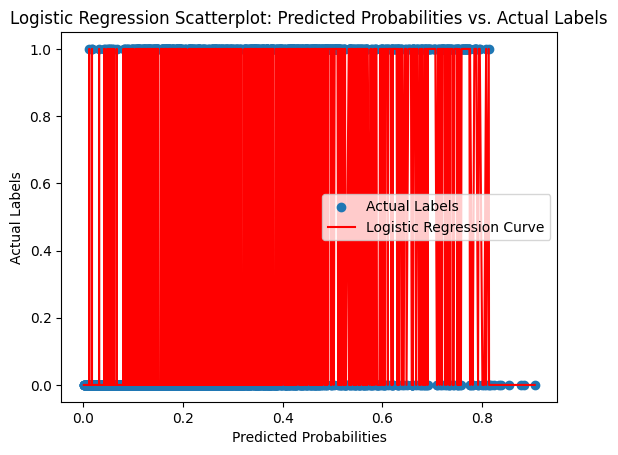

In [21]:
# Reseting the index we changed above
b_test.reset_index(drop=True, inplace=True)
a_test_encoded.reset_index(drop=True, inplace=True)

#Scatterplot between predicted values vs. Actual values
b_pred_proba = lr.predict_proba(a_test_encoded)[:, 1]  # Predicted probabilities for class 1 (positive class)

# Sort the predicted probabilities and actual labels based on predicted probabilities
sorted_indices = np.argsort(b_pred_proba)
b_pred_proba_sorted = b_pred_proba[sorted_indices]
b_test_sorted = b_test[sorted_indices]

# Plot scatterplot
plt.scatter(b_pred_proba, b_test, label='Actual Labels')
plt.xlabel("Predicted Probabilities")
plt.ylabel("Actual Labels")
plt.title("Logistic Regression Scatterplot: Predicted Probabilities vs. Actual Labels")

# Plot logistic regression curve
plt.plot(b_pred_proba_sorted, b_test_sorted, color='red', label='Logistic Regression Curve')
plt.legend()
plt.show()